In [1]:
!python --version

Python 3.8.8


In [2]:
import pandas as pd
import numpy as np
from numpy import quantile, random, where

data = pd.read_csv('PS_20174392719_1491204439457_log.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df = data.copy()
df.head()
df['step'].value_counts()

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [4]:
df['isFraud'].value_counts()
outliers = df[df['isFraud']==1]
inliers = df[df['isFraud']==0]

In [5]:
inliers = inliers[:-5862620]

In [6]:
inliers = inliers.append(outliers, ignore_index=True)
df = inliers

In [7]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
3,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
4,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
499995,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
499996,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
499997,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
499998,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [8]:
df['type'].value_counts()


CASH_OUT    183371
PAYMENT     161478
CASH_IN     107522
TRANSFER     44076
DEBIT         3553
Name: type, dtype: int64

In [9]:
print(df['nameOrig'].value_counts())
df['nameDest'].value_counts()

C838964826     2
C1710302637    2
C375315317     2
C199116739     2
C133857826     2
              ..
C168414769     1
C306393533     1
C2062199679    1
C1502489399    1
C1280323807    1
Name: nameOrig, Length: 499952, dtype: int64


C985934102     91
C248609774     87
C1286084959    87
C665576141     83
C2083562754    82
               ..
M913291957      1
M18343338       1
M1161599968     1
M464604367      1
C873221189      1
Name: nameDest, Length: 219035, dtype: int64

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


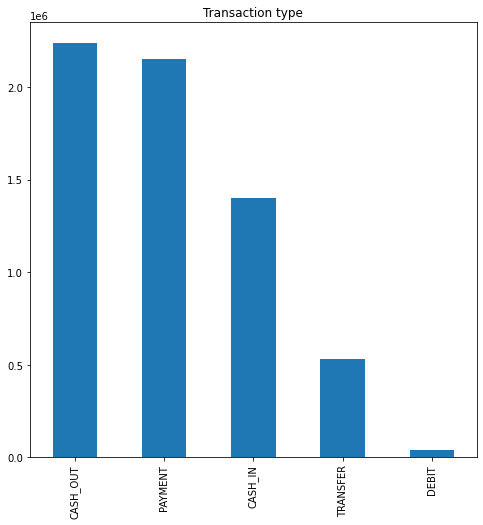

In [10]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

print(data.type.value_counts())

f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

/Users/ppe/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


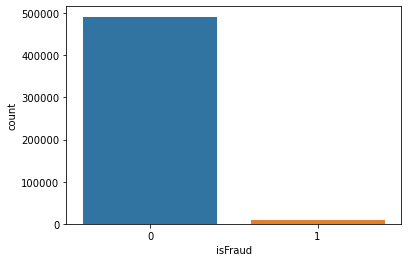

In [11]:
import seaborn as sns
sns.countplot(df['isFraud'])
plt.show()

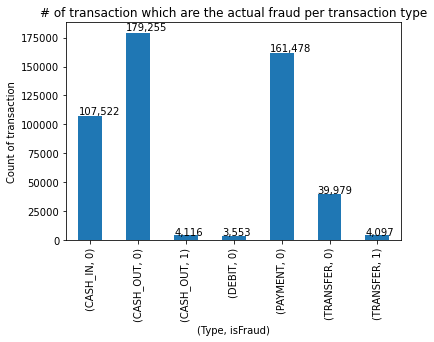

In [12]:
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

In [13]:
type_map = {
    'PAYMENT':'1',
    'TRANSFER':'2',
    'CASH_OUT':'3',
    'DEBIT':'1',
    'CASH_IN':'1'
}
df['type'] = df['type'].map(type_map)

df['type'].unique()

df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
3,1,1,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
4,1,1,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [14]:
df['isFraud'].value_counts()

0    491787
1      8213
Name: isFraud, dtype: int64

In [15]:
df.drop(['step','nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1,inplace=True)
X, y = df.loc[:, df.columns != 'isFraud'], df.loc[:, df.columns == 'isFraud']
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
columnNames=list(df.columns)[:-1] #Dropping class column, as it's the target column.
contamination=len(df[df['isFraud']==1])/float(len(df[df['isFraud']==0]))
print(contamination)

0.01670031944724037


In [18]:
len(df[df['isFraud']==0])

491787

In [19]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, plot_roc_curve

# identify outliers in the training dataset
lof = LocalOutlierFactor(contamination=contamination)
# df.drop(['isFraud_LOF'], axis=1,inplace=True)
df['isFraud_LOF'] = lof.fit_predict(df[columnNames].values)

In [20]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
df['isFraud_LOF']=abs(df['isFraud_LOF']-1)//2 
print("Accuracy (LOF): ",accuracy_score(y,df['isFraud_LOF']))
print("MSE (LOF): ",mean_squared_error(y,df['isFraud_LOF']))
print(df.groupby(['isFraud_LOF']).size())

Accuracy (LOF):  0.96748
MSE (LOF):  0.03252
isFraud_LOF
0    491649
1      8351
dtype: int64


In [ ]:
len(y.index)

In [21]:
# df.drop(['isFraud_LOF'], axis=1,inplace=True)
from sklearn.model_selection import train_test_split
X = df[columnNames]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [26]:
print(len(y_test[y_test['isFraud']==1]))
print(len(y_train[y_train['isFraud']==1]))

2715
5498


In [ ]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=contamination)
iso.fit(X_train)
pred = iso.predict(X_test)
y_test['isFraud_ISO'] = pred
y_test['isFraud_ISO']=abs(y_test['isFraud_ISO']-1)//2 
print("Accuracy (ISO): ",accuracy_score(y_test['isFraud'],y_test['isFraud_ISO']))
print("MSE (ISO): ",mean_squared_error(y_test['isFraud'],y_test['isFraud_ISO']))
print(y_test.groupby(['isFraud_ISO']).size())

In [ ]:
outlier_index = where(pred==-1)
values = X_test.index.isin(outlier_index)

plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1])
plt.scatter(values[:,0], values[:,1], color='y')
plt.show()

In [ ]:
# #Import svm model
# from sklearn import svm
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import StandardScaler

# #Create a svm Classifier
# clf = make_pipeline(StandardScaler(), SVC(gamma='auto',probability=False))

# #Train the model using the training sets
# clf.fit(X_train, y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

In [ ]:
# #Import scikit-learn metrics module for accuracy calculation
# from sklearn import metrics

# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
# df.drop(['isFraud_LOF'], axis=1,inplace=True)
from sklearn.model_selection import train_test_split
logistic = inliers.copy()
ype = logistic['isFraud']
logistic.drop(['isFlaggedFraud','isFraud','nameOrig','nameDest'], axis=1,inplace=True)
type_map = {
    'PAYMENT':'1',
    'TRANSFER':'2',
    'CASH_OUT':'3',
    'DEBIT':'1',
    'CASH_IN':'1'
}
logistic['type'] = logistic['type'].map(type_map)

logistic['type'].unique()
X_train, X_test, y_train, y_test = train_test_split(logistic, ype, test_size=0.33, random_state=42)
from sklearn.linear_model import LogisticRegression
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
trans = StandardScaler()
X_train_tr = trans.fit_transform(X_train)
X_test_tr = trans.fit_transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print("Accuracy (LOGISTIC): ",accuracy_score(predictions,y_test))
print("MSE (LOGISTIC): ",mean_squared_error(predictions,y_test))

In [ ]:
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# define the pipeline
trans = StandardScaler()
model = KNeighborsClassifier()
X_train_tr = trans.fit_transform(X_train)
X_test_tr = trans.fit_transform(X_test)
model.fit(X_train_tr,y_train)
y_pred = model.predict(X_test_tr)
print("Accuracy (KNN): ",classification_report(y_pred,y_test['isFraud']))
print("MSE (KNN): ",mean_squared_error(y_pred,y_test['isFraud']))